# Data loading


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import pandas as pd
import numpy as np

In [2]:
# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2


In [3]:
df = pd.read_csv(path+'/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data exploration


In [4]:
print(df.shape)

(374, 13)


In [5]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [6]:
print(df.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [7]:
print(df.isnull().sum())
print("\nMissing Value Proportion:\n", df.isnull().mean())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Missing Value Proportion:
 Person ID                  0.000000
Gender                     0.000000
Age                        0.000000
Occupation                 0.000000
Sleep Duration             0.000000
Quality of Sleep           0.000000
Physical Activity Level    0.000000
Stress Level               0.000000
BMI Category               0.000000
Blood Pressure             0.000000
Heart Rate                 0.000000
Daily Steps                0.000000
Sleep Disorder             0.585561
dtype: float64


In [8]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [9]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

# Data cleaning


In [10]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [11]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


In [12]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [13]:
df['Sleep Disorder'].fillna('None', inplace=True)

<ipython-input-13-baf0d52f98af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)


In [14]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

# Remove duplicate rows
df.drop_duplicates(inplace=True)
df.shape

0


(374, 13)

# Data analysis


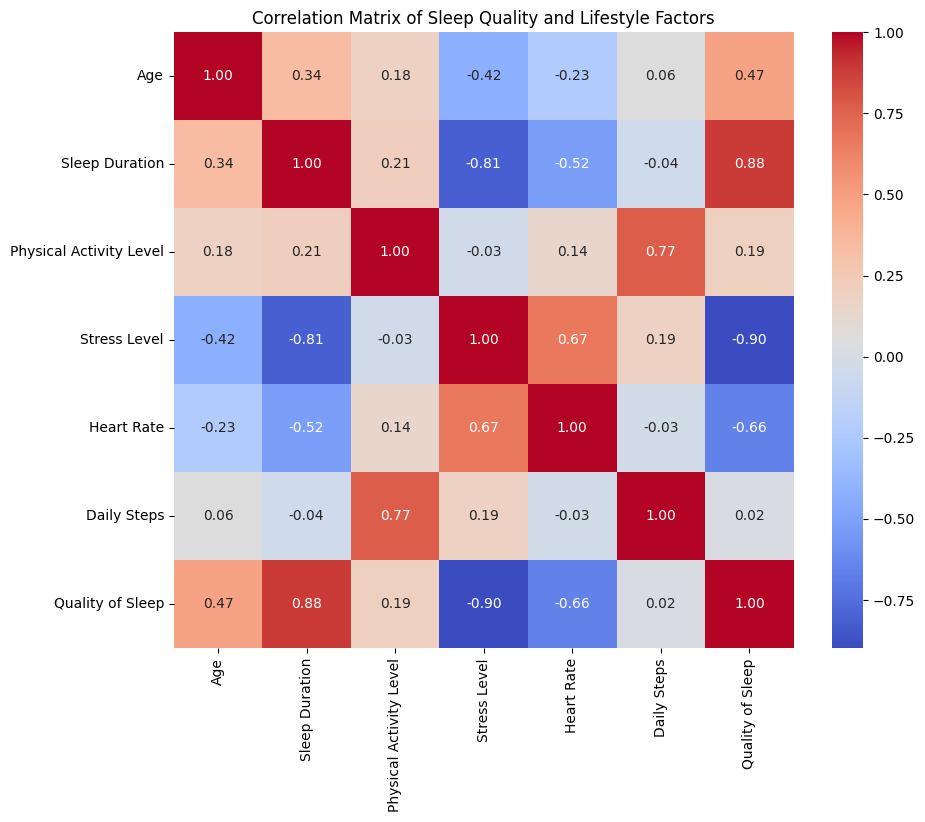

In [15]:
# relevant variables
r_variables = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
                     'Heart Rate', 'Daily Steps', 'Quality of Sleep']
# correlation matrix
correlation_matrix = df[r_variables].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sleep Quality and Lifestyle Factors')
plt.show()

 # Questions:

#Q.1	How do physical activity levels influence the quality and length of sleep?

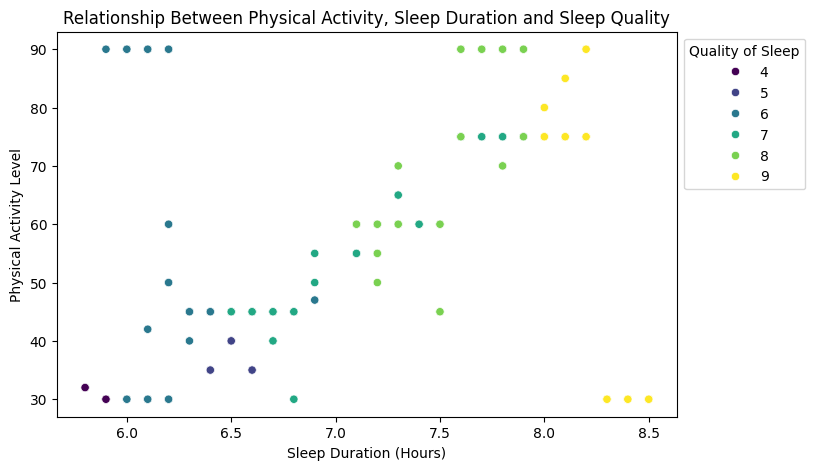

In [16]:
#Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sleep Duration"], y=df["Physical Activity Level"], hue=df["Quality of Sleep"], palette="viridis")
plt.xlabel("Sleep Duration (Hours)")
plt.ylabel("Physical Activity Level")
plt.title("Relationship Between Physical Activity, Sleep Duration and Sleep Quality")
plt.legend(title="Quality of Sleep", bbox_to_anchor=(1, 1))
plt.show()

# Q.2	How is sleeping pattern related to the level of stress?

In [17]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9])

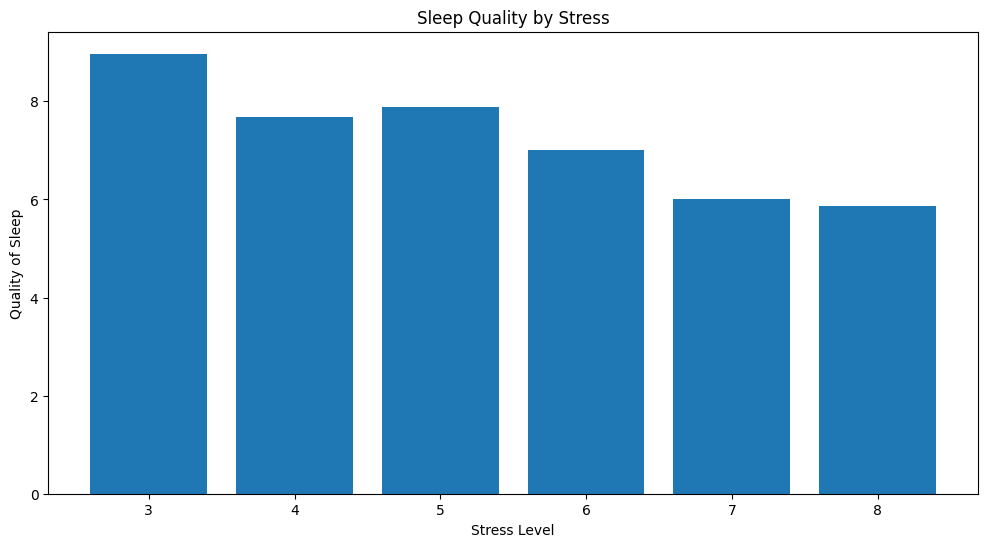

In [18]:
# Group by age
age_groups = df.groupby('Stress Level')['Quality of Sleep'].mean()

#Plot
plt.figure(figsize=(12, 6))
plt.bar(age_groups.index, age_groups.values)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Quality by Stress')
plt.show()

# Q.3 What is the impact of BMI on sleep quality and the development of sleep disorders?

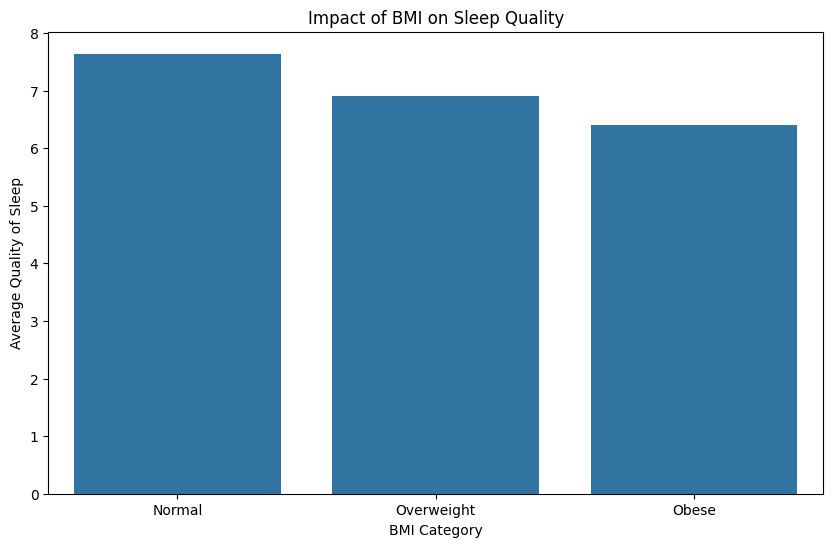

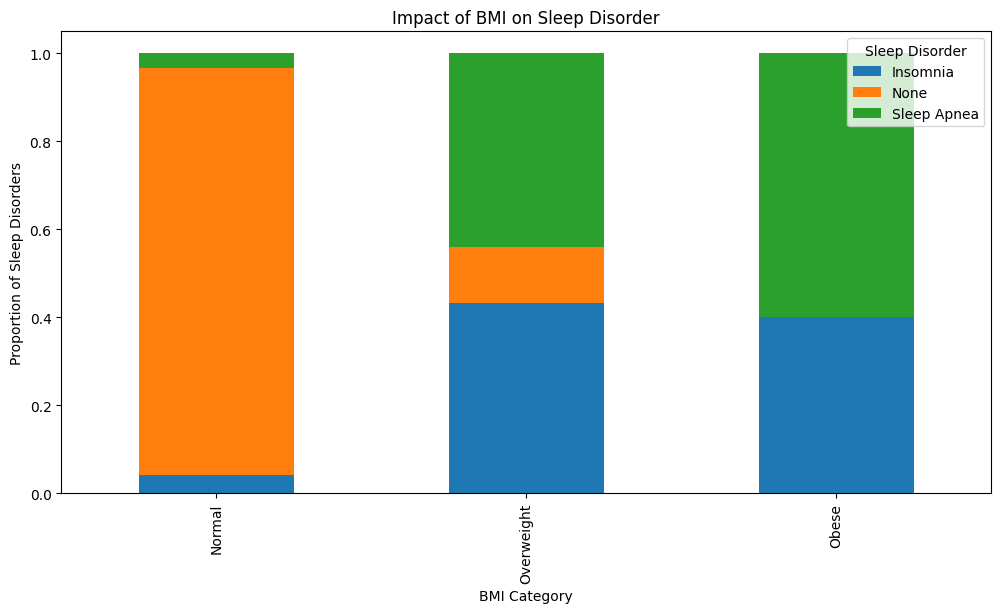

In [19]:
# Group by BMI and sleep quality
bmi_sleep_quality = df.groupby('BMI Category')['Quality of Sleep'].mean()
# Define order of BMI
bmi_order = ['Normal', 'Overweight', 'Obese']
#Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bmi_sleep_quality.index, y=bmi_sleep_quality.values, order=bmi_order)
plt.xlabel('BMI Category')
plt.ylabel('Average Quality of Sleep')
plt.title('Impact of BMI on Sleep Quality')
plt.show()

# Group by BMI and Sleep Disorder
bmi_sleep_disorder = df.groupby('BMI Category')['Sleep Disorder'].value_counts(normalize=True).unstack()
# Define order of BMI
bmi_sleep_disorder = bmi_sleep_disorder.reindex(bmi_order)
# Plot
bmi_sleep_disorder.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('BMI Category')
plt.ylabel('Proportion of Sleep Disorders')
plt.title('Impact of BMI on Sleep Disorder')
plt.legend(title='Sleep Disorder')
plt.show()

# Q.4	How are daily activity, including steps per day and heart rate, impacting sleep health?

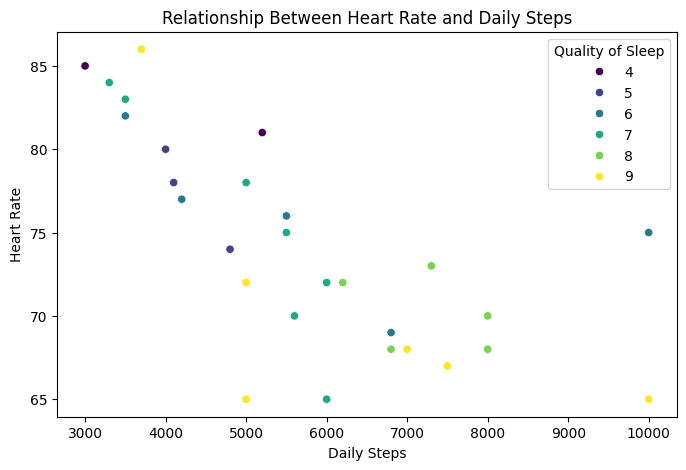

In [20]:
# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Daily Steps"], y=df["Heart Rate"], hue=df["Quality of Sleep"], palette="viridis")
plt.xlabel("Daily Steps")
plt.ylabel("Heart Rate")
plt.title("Relationship Between Heart Rate and Daily Steps")
plt.legend(title="Quality of Sleep", bbox_to_anchor=(1, 1))
plt.show()

# Q.5	Are lifestyle modifications helpful in improving sleeping disorders?

               Physical Activity Level            Sleep Duration          
                                  mean        std           mean       std
Sleep Disorder                                                            
Insomnia                     46.818182  11.751514       6.589610  0.387157
None                         57.949772  20.929814       7.358447  0.732320
Sleep Apnea                  74.794872  17.926516       7.032051  0.974812


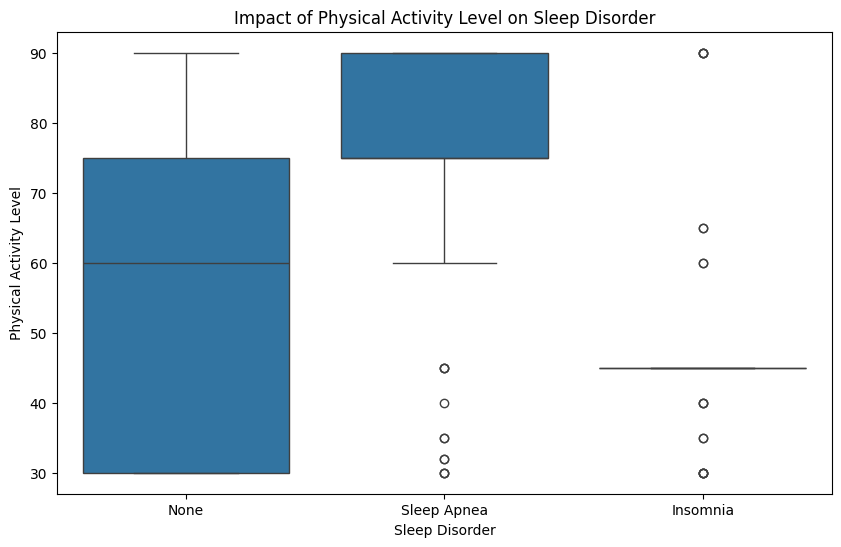

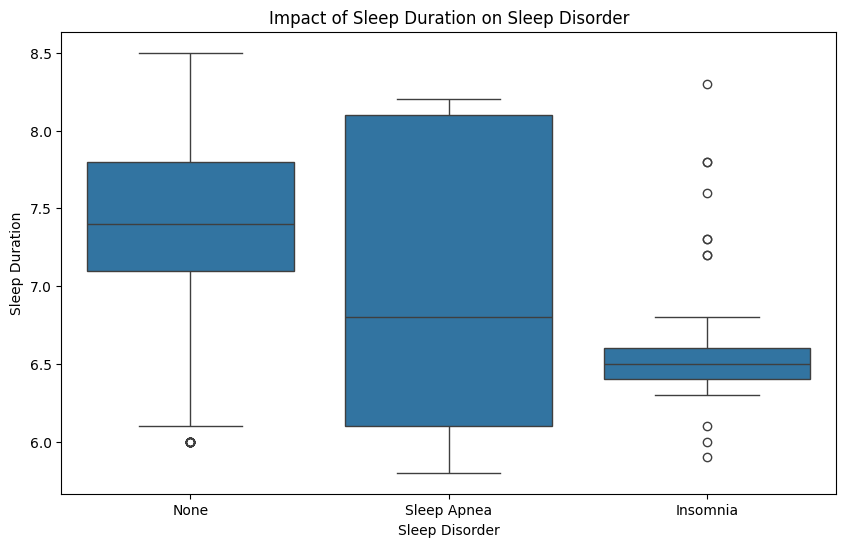

In [21]:
# Lifestyle factors
lifestyle_factors = ['Physical Activity Level', 'Sleep Duration']
sleep_disorder_counts = df.groupby('Sleep Disorder')[lifestyle_factors].agg(['mean', 'std'])
print(sleep_disorder_counts)

# PLot
for factor in lifestyle_factors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sleep Disorder', y=factor, data=df)
    plt.xlabel('Sleep Disorder')
    plt.ylabel(factor)
    plt.title(f'Impact of {factor} on Sleep Disorder')
    plt.show()